In [1]:
# !pip install pandas plotly mlxtend ipywidgets ipykernel nbformat matplotlib seaborn

# EDA e Visualização de Dados 
import pandas as pd
import numpy as np
import plotly.express as px
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt
import seaborn as sns

# ML 
from mlxtend.frequent_patterns import apriori, association_rules

### Carga dos dados

In [2]:
# Carregar os dados no DF

df_transacoes = pd.read_csv('./datasets/game_sales.csv', sep=',')

In [3]:
# Visualizar a estrutura do DF

df_transacoes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Client ID  10000 non-null  object
 1   Game ID    10000 non-null  object
 2   Game Name  10000 non-null  object
dtypes: object(3)
memory usage: 234.5+ KB


In [4]:
# Visualizar os primeiros registros

df_transacoes.head(10)

,Client ID,Game ID,Game Name
0,CLIENT-0369,GAME-0013,Elden Ring
1,CLIENT-0287,GAME-0006,Call of Duty: Modern Warfare
2,CLIENT-0108,GAME-0030,PUBG: Battlegrounds
3,CLIENT-0291,GAME-0002,Minecraft
4,CLIENT-0277,GAME-0027,Battlefield 2042
5,CLIENT-0374,GAME-0009,Cyberpunk 2077
6,CLIENT-0034,GAME-0022,ARK: Survival Evolved
7,CLIENT-0316,GAME-0014,God of War Ragnarök
8,CLIENT-0375,GAME-0031,Destiny 2
9,CLIENT-0026,GAME-0016,Resident Evil 4


In [5]:
# Visualizar os últimos registros

df_transacoes.tail(10)

,Client ID,Game ID,Game Name
9990,CLIENT-0491,GAME-0004,Valorant
9991,CLIENT-0333,GAME-0013,Elden Ring
9992,CLIENT-0271,GAME-0003,League of Legends
9993,CLIENT-0027,GAME-0006,Call of Duty: Modern Warfare
9994,CLIENT-0370,GAME-0015,Hogwarts Legacy
9995,CLIENT-0342,GAME-0011,FIFA 24
9996,CLIENT-0316,GAME-0005,Grand Theft Auto V
9997,CLIENT-0326,GAME-0004,Valorant
9998,CLIENT-0051,GAME-0031,Destiny 2
9999,CLIENT-0431,GAME-0012,NBA 2K24


### EDA

In [6]:
# Quantidade de Jogos Únicos

df_transacoes['Game ID'].nunique()

33

In [7]:
# Quantidade de Clientes Únicos

df_transacoes['Client ID'].nunique()

591

In [8]:
# Contar quantidade de vendas por jogo

contagem = df_transacoes.value_counts("Game Name").reset_index()
contagem.columns = ["Game Name", "Vendas"]

#  Criar o gráfico
fig = px.bar(
    contagem,
    x="Vendas",
    y="Game Name",
    orientation="h",
    text="Vendas",
    color="Game Name",
)
fig.update_traces(textposition="outside")
fig.update_layout(
    title="Quantidade de Vendas por Jogo",
    xaxis_title="Vendas",
    yaxis_title="Nome do Jogo",
    showlegend=False,
)

# Mostrar o gráfico
fig.show()

In [9]:
# 1. Calcular porcentagem de ocorrência por jogo
porcentagem = (
    df_transacoes['Game Name']
    .value_counts(normalize=True) * 100
).reset_index()

porcentagem.columns = ['Game Name', 'Porcentagem']

# 2. Criar o gráfico
fig_porcentagem_jogos = px.bar(
    porcentagem,
    x='Porcentagem',
    y='Game Name',
    orientation='h',
    text=porcentagem['Porcentagem'].round(2).astype(str) + '%',
    color='Game Name'
)

# 3. Ajustes visuais
fig_porcentagem_jogos.update_traces(textposition='outside')
fig_porcentagem_jogos.update_layout(
    title='Porcentagem de Ocorrência por Jogo',
    xaxis_title='Porcentagem (%)',
    yaxis_title='Nome do Jogo',
    showlegend=False
)

# 4. Exibir
fig_porcentagem_jogos.show()

### Preparação dos dados

Client ID | Game A | Game B | Game C |

In [10]:
df = df_transacoes.copy()

# Criar tabela no formato cliente x jogo
df_games_pivot = pd.crosstab(df['Client ID'], df['Game Name'])

In [11]:
# Verificar os primeiros registros

df_games_pivot.head(20)

Game Name,ARK: Survival Evolved,Among Us,Apex Legends,Assassin's Creed Valhalla,Battlefield 2042,Call of Duty: Modern Warfare,Counter-Strike 2,Cyberpunk 2077,Destiny 2,Dota 2,...,NBA 2K24,Overwatch 2,PUBG: Battlegrounds,Red Dead Redemption 2,Resident Evil 4,Roblox,Rocket League,The Sims 4,The Witcher 3,Valorant
Client ID,,,,,,,,,,,,,,,,,,,,,
CLIENT-0001,1,1,0,1,0,1,1,1,1,0,...,1,1,1,1,1,1,1,1,1,1
CLIENT-0002,0,1,1,1,1,1,0,0,0,0,...,0,1,0,0,1,0,1,0,0,1
CLIENT-0003,1,1,1,0,0,1,1,1,1,0,...,1,0,1,0,1,1,1,1,0,1
CLIENT-0004,1,0,1,0,1,1,1,0,0,1,...,1,0,0,1,1,1,1,0,1,0
CLIENT-0005,1,0,1,0,1,1,0,1,1,1,...,0,1,0,0,0,1,1,1,0,0
CLIENT-0006,1,0,0,0,0,1,1,1,1,0,...,1,1,1,0,1,1,0,0,0,0
CLIENT-0007,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
CLIENT-0008,1,0,1,1,0,1,1,1,1,1,...,1,1,1,1,1,1,1,1,0,1
CLIENT-0009,1,1,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0


In [12]:
# Converter para True/False conforme exigido pelo Apriori
df_games_pivot = df_games_pivot.applymap(lambda x: True if x > 0 else False)

C:\Users\pedro\AppData\Local\Temp\ipykernel_15040\3097675215.py:2: FutureWarning:

DataFrame.applymap has been deprecated. Use DataFrame.map instead.



In [13]:
# Remover o título Departamento

df_games_pivot = df_games_pivot.rename_axis(None, axis=1)

In [14]:
# Dropar / Remover a Coluna ID_Transacoes

df_games_pivot.reset_index(inplace=True)

# Remover a coluna ID_Transacoes

df_games_pivot.drop(columns=['Client ID'], axis=1, inplace=True)

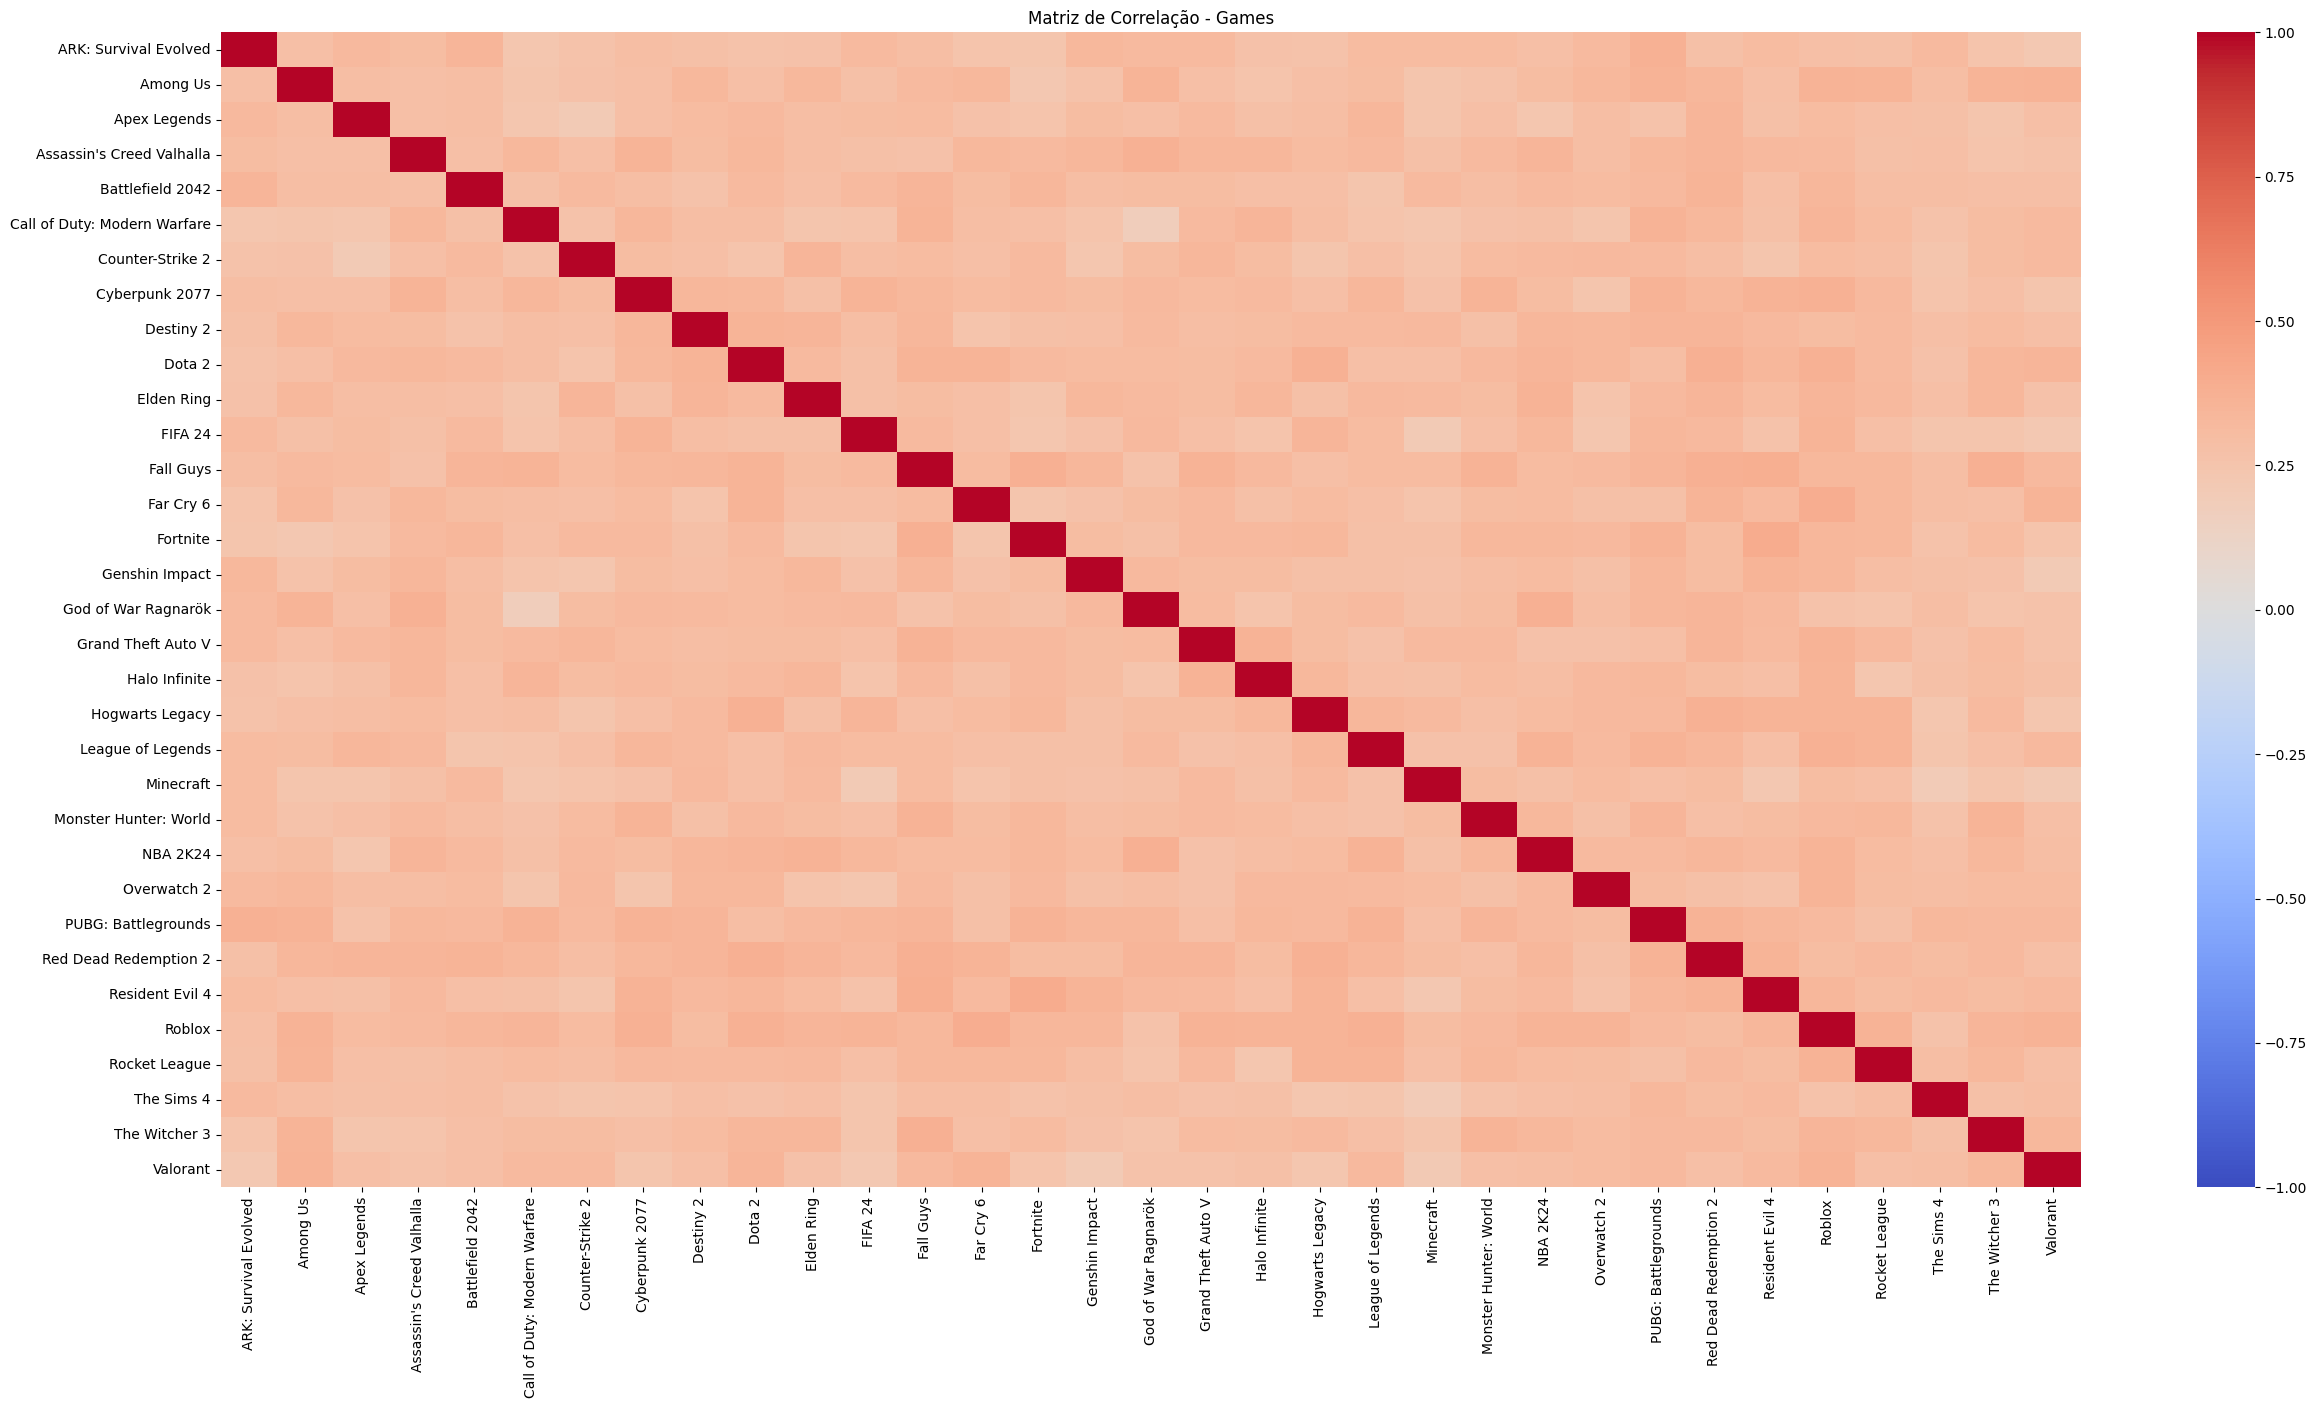

In [15]:
# Qual a correlação entre os jogos

associacao_games = df_games_pivot.corr()

plt.figure(figsize=(30,15))
sns.heatmap(associacao_games, cmap='coolwarm', annot=False, vmin=-1, vmax=1)
plt.title('Matriz de Correlação - Games')
plt.show()

### Aplicação o algoritmo Apriori e regras de associação

In [19]:
min_suporte = 0.01
min_freq = int(len(df_games_pivot) * min_suporte)

# remove colunas raras
frequencia = df_games_pivot.sum()
colunas_validas = frequencia[frequencia >= min_freq].index

df_reduzido = df_games_pivot[colunas_validas]
df_reduzido.shape


(591, 33)

In [30]:
# Obter uma lista de itemsets frequentes

# Suporte que seja em 2% a 5%
# Cobertura adequada = 40 a 100 transações 
# diversidade de Departamentos, sem ser muito restritivo

itemsets_frequentes = apriori(df_reduzido, min_support=0.02, use_colnames=True, max_len=4, verbose=1)

Processing 163680 combinations | Sampling itemset size 4


In [31]:
# Quantos itemsets foram selecionados

len(itemsets_frequentes)

46937

In [32]:
# Criar uma coluna para armazenar o tamanho do itemset

itemsets_frequentes['tamanho'] = itemsets_frequentes['itemsets'].apply(lambda x: len(x))

In [33]:
# Quais são estes itemsets?

itemsets_frequentes

,support,itemsets,tamanho
0,0.487310,(ARK: Survival Evolved),1
1,0.514382,(Among Us),1
2,0.519459,(Apex Legends),1
3,0.490694,(Assassin's Creed Valhalla),1
4,0.495770,(Battlefield 2042),1
...,...,...,...
46932,0.204738,"(Roblox, The Sims 4, The Witcher 3, Rocket Lea...",4
46933,0.211506,"(Valorant, Roblox, The Sims 4, Rocket League)",4
46934,0.206430,"(Valorant, Roblox, The Witcher 3, Rocket League)",4
46935,0.206430,"(Valorant, Roblox, The Sims 4, The Witcher 3)",4


In [37]:
# filtrar itemsets com 2 departamentos

itemsets_frequentes[itemsets_frequentes.tamanho == 4]

,support,itemsets,tamanho
6017,0.184433,"(Assassin's Creed Valhalla, ARK: Survival Evol...",4
6018,0.196277,"(ARK: Survival Evolved, Battlefield 2042, Apex...",4
6019,0.182741,"(Call of Duty: Modern Warfare, ARK: Survival E...",4
6020,0.184433,"(ARK: Survival Evolved, Apex Legends, Counter-...",4
6021,0.194585,"(ARK: Survival Evolved, Apex Legends, Cyberpun...",4
...,...,...,...
46932,0.204738,"(Roblox, The Sims 4, The Witcher 3, Rocket Lea...",4
46933,0.211506,"(Valorant, Roblox, The Sims 4, Rocket League)",4
46934,0.206430,"(Valorant, Roblox, The Witcher 3, Rocket League)",4
46935,0.206430,"(Valorant, Roblox, The Sims 4, The Witcher 3)",4


In [44]:
rules = association_rules(itemsets_frequentes, metric="confidence", min_threshold=0.9)
rules_sorted = rules.sort_values('lift', ascending=False)

rules_sorted

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
26,"(Far Cry 6, Grand Theft Auto V, Battlefield 2042)",(Red Dead Redemption 2),0.240271,0.494078,0.216582,0.901408,1.824426,1.0,0.097870,5.131496,0.594794,0.418301,0.805125,0.669882
13,"(Genshin Impact, The Witcher 3, Among Us)",(PUBG: Battlegrounds),0.226734,0.514382,0.206430,0.910448,1.769982,1.0,0.089802,5.422730,0.562578,0.386076,0.815591,0.655882
6,"(ARK: Survival Evolved, Far Cry 6, Hogwarts Le...",(PUBG: Battlegrounds),0.225042,0.514382,0.204738,0.909774,1.768673,1.0,0.088980,5.382262,0.560811,0.382911,0.814205,0.653900
7,"(ARK: Survival Evolved, Fortnite, Hogwarts Leg...",(PUBG: Battlegrounds),0.233503,0.514382,0.211506,0.905797,1.760941,1.0,0.091396,5.155018,0.563762,0.394322,0.806014,0.658491
5,"(Genshin Impact, ARK: Survival Evolved, Far Cr...",(PUBG: Battlegrounds),0.228426,0.514382,0.206430,0.903704,1.756871,1.0,0.088931,5.042952,0.558348,0.384858,0.801703,0.652510
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62,"(Minecraft, Red Dead Redemption 2, The Sims 4)",(Overwatch 2),0.223350,0.538071,0.201354,0.901515,1.675457,1.0,0.081175,4.690355,0.519086,0.359517,0.786797,0.637864
60,"(Minecraft, The Sims 4, League of Legends)",(Overwatch 2),0.219966,0.538071,0.197970,0.900000,1.672642,1.0,0.079612,4.619289,0.515546,0.353474,0.783516,0.633962
10,"(ARK: Survival Evolved, Minecraft, The Sims 4)",(Overwatch 2),0.219966,0.538071,0.197970,0.900000,1.672642,1.0,0.079612,4.619289,0.515546,0.353474,0.783516,0.633962
35,"(NBA 2K24, Fortnite, Far Cry 6)",(Counter-Strike 2),0.241963,0.541455,0.218274,0.902098,1.666062,1.0,0.087262,4.683708,0.527391,0.386228,0.786494,0.652611


In [46]:
rules = association_rules(itemsets_frequentes, metric="lift", min_threshold=0.9)
rules_sorted = rules.sort_values('lift', ascending=False)

rules_sorted

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
100129,"(The Sims 4, League of Legends)","(ARK: Survival Evolved, Valorant)",0.318105,0.306261,0.206430,0.648936,2.118902,1.0,0.109007,1.976106,0.774397,0.493927,0.493954,0.661485
100132,"(ARK: Survival Evolved, Valorant)","(The Sims 4, League of Legends)",0.306261,0.318105,0.206430,0.674033,2.118902,1.0,0.109007,2.091915,0.761176,0.493927,0.521969,0.661485
381584,"(Fortnite, Far Cry 6)","(Resident Evil 4, Counter-Strike 2)",0.314721,0.335025,0.221658,0.704301,2.102232,1.0,0.116219,2.248823,0.765112,0.517787,0.555323,0.682959
381589,"(Resident Evil 4, Counter-Strike 2)","(Fortnite, Far Cry 6)",0.335025,0.314721,0.221658,0.661616,2.102232,1.0,0.116219,2.025153,0.788474,0.517787,0.506210,0.682959
88704,"(ARK: Survival Evolved, Far Cry 6)","(The Sims 4, League of Legends)",0.297800,0.318105,0.197970,0.664773,2.089791,1.0,0.103238,2.034128,0.742642,0.473684,0.508389,0.643557
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
337,(Call of Duty: Modern Warfare),(Overwatch 2),0.560068,0.538071,0.362098,0.646526,1.201562,1.0,0.060742,1.306825,0.381308,0.491954,0.234786,0.659741
133,(Counter-Strike 2),(Apex Legends),0.541455,0.519459,0.333333,0.615625,1.185128,1.0,0.052070,1.250189,0.340663,0.458140,0.200121,0.628659
132,(Apex Legends),(Counter-Strike 2),0.519459,0.541455,0.333333,0.641694,1.185128,1.0,0.052070,1.279757,0.325070,0.458140,0.218602,0.628659
321,(Call of Duty: Modern Warfare),(God of War Ragnarök),0.560068,0.517766,0.333333,0.595166,1.149488,1.0,0.043349,1.191189,0.295607,0.447727,0.160502,0.619479


In [ ]:
top_lift = rules_sorted.head(10)
fig = px.bar(
    top_lift,
    x='lift',
    y=top_lift['antecedents'].astype(str) + ' → ' + top_lift['consequents'].astype(str),
    orientation='h',
    title="Top 10 Regras de Associação por Lift"
)
fig.show()